In [1]:
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sys.path.append('../')
from envir import config

In [2]:
# read in files
files = ['KOKX2016night.csv', 'KOKX2017night.csv',
         'KOKX2018night.csv', 'KOKX2019night.csv']
kokx = pd.DataFrame()
for f in files:
    temp = pd.read_csv(config.dataFol+'clean_nexrad/'+f)
    kokx = kokx.append(temp)

In [3]:
kokx['year'] = pd.DatetimeIndex(kokx['datetime']).year
kokx['month'] = pd.DatetimeIndex(kokx['datetime']).month
kokx['day'] = pd.DatetimeIndex(kokx['datetime']).day
kokx['date'] = pd.to_datetime(kokx.year*10000+kokx.month*100+kokx.day,format='%Y%m%d')
kokx['datetime'] = pd.to_datetime(kokx.datetime)
kokx.set_index(kokx.datetime, inplace=True)

In [4]:
kokx.head(2)

,datetime,mtr,vid,vir,rtr,mt,rt,ff,dd,u,v,height,airspeed,heading,airspeed_u,airspeed_v,year,month,day,date
datetime,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:01:23,2016-01-01 00:01:23,2.404765,0.100105,1.10116,26.452419,0.196389,2.160281,6.672867,120.481784,5.745748,-3.382044,246.073922,2.245836,250.508740,-2.125352,-0.460421,2016,1,1,2016-01-01
2016-01-01 00:11:11,2016-01-01 00:11:11,2.401061,0.087945,0.96739,26.411676,0.587562,6.463183,7.583887,109.591163,7.109099,-2.530201,229.731845,1.218308,23.347845,-0.425245,0.419093,2016,1,1,2016-01-01


In [5]:
kokx.describe()

,mtr,vid,vir,rtr,mt,rt,ff,dd,u,v,height,airspeed,heading,airspeed_u,airspeed_v,year,month,day
count,119750.000000,119750.000000,119750.000000,119750.000000,1.197500e+05,1.197500e+05,119750.000000,119750.000000,119750.000000,119750.000000,119750.000000,119750.000000,119750.000000,119750.000000,119750.000000,119750.000000,119750.000000,119750.000000
mean,270.091712,7.336920,80.706125,2971.008833,5.454709e+05,6.000180e+06,9.117920,100.236319,2.638886,0.254255,441.148054,4.889732,95.545896,-0.290222,0.113669,2017.376459,6.250889,15.625987
std,1140.182465,26.046976,286.516738,12542.007114,5.342596e+05,5.876856e+06,4.432591,87.697396,6.821399,6.414607,249.648436,3.188288,83.391268,4.167966,3.425167,1.066777,3.534317,8.803057
min,0.000000,0.006926,0.076190,0.000000,1.706356e-01,1.876991e+00,0.000000,-89.996494,-64.601200,-77.885743,115.597081,0.000000,-87.959793,-63.029303,-74.893681,2016.000000,1.000000,1.000000
25%,9.504372,0.305385,3.359235,104.548097,8.583535e+04,9.441889e+05,6.090128,43.931241,-2.337756,-4.197266,246.843949,2.755911,31.135675,-2.426411,-1.893415,2016.000000,3.000000,8.000000
50%,32.316562,1.141305,12.554355,355.482187,4.259954e+05,4.685950e+06,8.395274,88.749895,3.144089,0.083342,375.315036,4.093918,91.985295,-0.213193,0.005452,2017.000000,6.000000,16.000000
75%,115.540672,4.296187,47.258057,1270.947393,8.160414e+05,8.976455e+06,11.365944,171.547896,7.438281,4.324366,581.321660,6.221649,163.152480,1.945909,1.910873,2018.000000,9.000000,23.000000
max,39141.509595,698.591324,7684.504560,430556.605550,1.781220e+06,1.959342e+07,77.950915,269.998606,52.021801,70.475318,2380.664937,78.117941,267.505523,53.686144,71.664854,2019.000000,12.000000,31.000000


In [6]:
# scans per year
kokx.groupby(['year']).count()['mtr']

year
2016    32311
2017    31819
2018    33848
2019    21772
Name: mtr, dtype: int64

Text(0, 0.5, 'mtr')

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


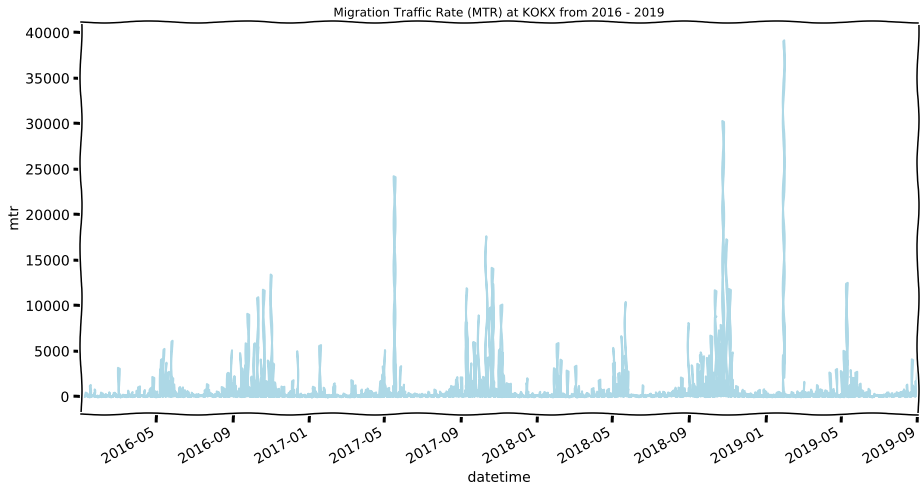

In [7]:
plt.xkcd()
kokx['mtr'].plot(color='lightblue', figsize=(15, 8))
plt.title('Migration Traffic Rate (MTR) at KOKX from 2016 - 2019', fontsize=12)
plt.ylabel('mtr')

In [8]:
kokx.groupby(['year', 'month', 'day']).mean()['mtr']

year  month  day
2016  1      1         8.193062
             2         7.361410
             3         7.360775
             4         6.467369
             5         9.348730
                       ...     
2019  8      28       19.745157
             29       64.293513
             30      864.152626
             31      389.050195
      9      1      1598.399594
Name: mtr, Length: 1335, dtype: float64

Text(0, 0.5, 'mtr')

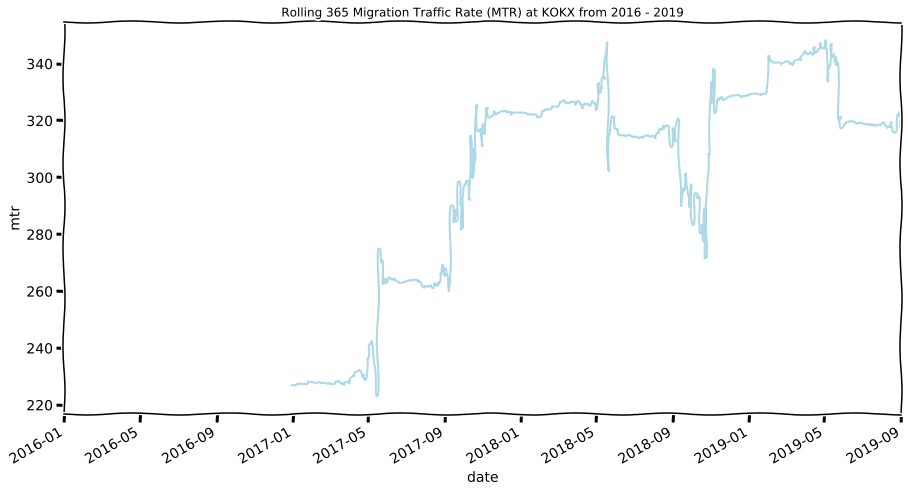

In [9]:
kokx.groupby(['date']).mean()['mtr'].rolling(window = 365).mean().plot(color='lightblue', figsize=(15, 8))
plt.title('Rolling 365 Migration Traffic Rate (MTR) at KOKX from 2016 - 2019', fontsize=12)
plt.ylabel('mtr')

In [10]:
kokx_by_day = kokx.groupby(['date']).mean()
pd.to_datetime(kokx_by_day.index).year


Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date', length=1335)

In [11]:
kokx_by_day.head()


,mtr,vid,vir,rtr,mt,rt,ff,dd,u,v,height,airspeed,heading,airspeed_u,airspeed_v,year,month,day
date,,,,,,,,,,,,,,,,,,
2016-01-01,8.193062,0.276783,3.044610,90.123685,119.851910,1318.371015,9.544093,107.344943,8.393473,-3.002062,423.147838,3.319441,76.217134,0.882437,-0.271914,2016,1,1
2016-01-02,7.361410,0.243226,2.675488,80.975506,628.776211,6916.538324,9.621528,103.832067,8.958274,-2.263610,250.626700,3.015356,45.083581,0.443319,1.100700,2016,1,2
2016-01-03,7.360775,0.220056,2.420620,80.968521,1103.085043,12133.935473,10.037219,76.433910,8.959857,2.428207,258.790958,3.430985,55.062018,1.188527,1.591720,2016,1,3
2016-01-04,6.467369,0.204916,2.254076,71.141061,1634.800254,17982.802796,9.549238,130.637327,6.650512,-4.365889,449.205624,4.626807,80.661241,2.129256,0.896881,2016,1,4
2016-01-05,9.348730,0.301624,3.317864,102.836028,1913.086836,21043.955196,9.241114,191.492896,-1.810769,-8.106683,508.863340,4.647838,83.057955,-0.277411,0.386438,2016,1,5


In [12]:
kokx_by_month = kokx.groupby(['year', 'month']).mean()
kokx_by_month.reset_index().pivot(index='month', columns='year', values='mtr')


year,2016,2017,2018,2019
month,,,,
1,17.195982,37.951178,23.799138,223.287204
2,25.104380,13.287499,74.376530,30.198422
3,54.757759,46.662340,64.740378,93.971052
4,86.345946,192.153269,98.217535,124.742495
5,483.380814,905.287219,875.243025,523.354125
6,83.581409,86.498745,41.594739,47.027070
7,90.489563,68.841061,65.727899,62.664246
8,258.219117,255.441062,269.357843,256.936383
9,519.234928,886.381445,578.928854,1598.399594


In [13]:
import seaborn as sns
kokx_by_month.reset_index().head()


,year,month,mtr,vid,vir,rtr,mt,rt,ff,dd,u,v,height,airspeed,heading,airspeed_u,airspeed_v,day
0,2016,1,17.195982,0.425175,4.676926,189.155807,8523.051027,9.375356e+04,9.532840,106.901101,4.142245,-1.269271,363.754446,4.472596,69.335352,0.555688,0.627316,15.581875
1,2016,2,25.104380,0.639190,7.031090,276.148178,29865.221293,3.285174e+05,10.179797,91.108401,3.286983,1.866523,401.636783,4.157175,74.894790,0.371569,0.428881,14.518188
2,2016,3,54.757759,1.274785,14.022640,602.335345,56510.306424,6.216134e+05,9.984364,90.801213,3.985467,1.785156,393.672352,4.894013,72.507133,1.568875,1.428137,15.652252
3,2016,4,86.345946,2.070679,22.777467,949.805405,89867.389283,9.885413e+05,9.575672,94.110385,4.692348,2.474801,439.258396,4.865093,71.032187,1.782688,1.849969,14.913113
4,2016,5,483.380814,12.203494,134.238431,5317.188955,214013.479444,2.354148e+06,8.655666,83.001065,4.818890,2.684695,484.091582,5.408570,61.021228,2.829127,2.735371,17.129216


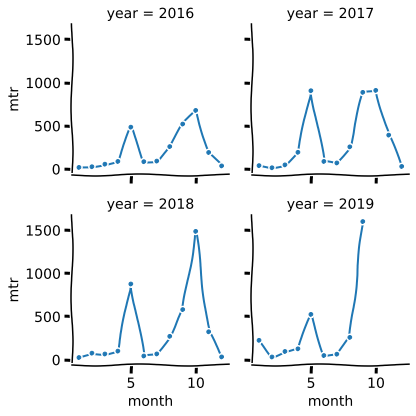

In [14]:
# annual patterns of mtr
g = sns.FacetGrid(kokx_by_month.reset_index(), col="year", col_wrap=2, height=3)
g = g.map(plt.plot, "month", "mtr", marker=".")

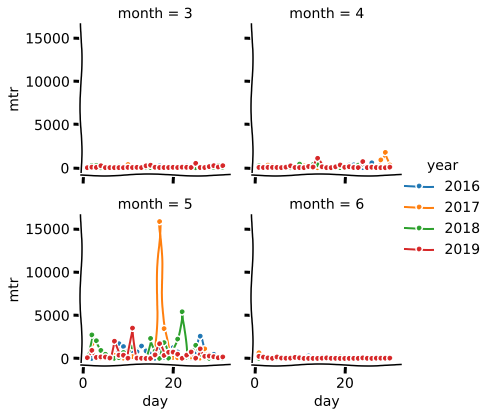

In [15]:
# annual patterns of mtr in March - June
g = sns.FacetGrid(kokx_by_day[(kokx_by_day['month']>=3) & (kokx_by_day['month']<=6)], hue="year",
                  col="month", col_wrap=2, height=3)
g = (g.map(plt.plot, "day", "mtr", marker=".").add_legend())

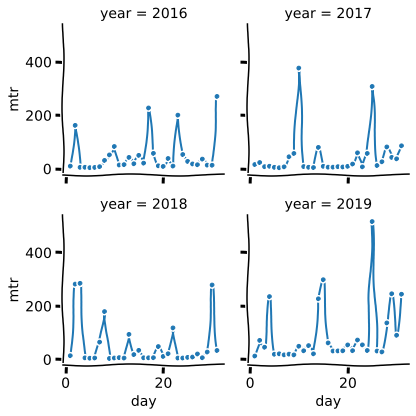

In [16]:
# annual patterns of mtr in March
g = sns.FacetGrid(kokx_by_day[kokx_by_day['month']==3], col="year", col_wrap=2, height=3)
g = g.map(plt.plot, "day", "mtr", marker=".")



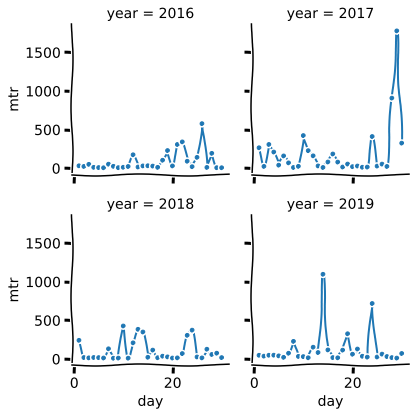

In [17]:
# annual patterns of mtr in April
g = sns.FacetGrid(kokx_by_day[kokx_by_day['month']==4], col="year", col_wrap=2, height=3)
g = g.map(plt.plot, "day", "mtr", marker=".")

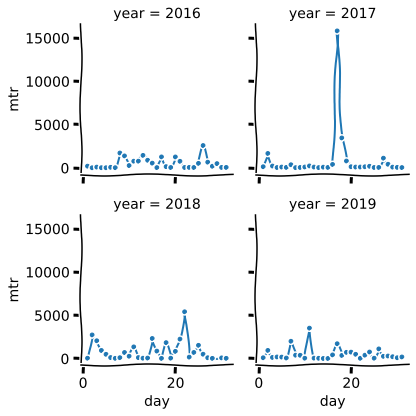

In [18]:
# annual patterns of mtr in May
g = sns.FacetGrid(kokx_by_day[kokx_by_day['month']==5], col="year", col_wrap=2, height=3)
g = g.map(plt.plot, "day", "mtr", marker=".")

In [19]:
dow = kokx_by_day.index.to_series()

In [20]:
kokx_by_day['day_of_week'] = dow.dt.dayofweek

In [21]:
kokx_by_day.head()

,mtr,vid,vir,rtr,mt,rt,ff,dd,u,v,height,airspeed,heading,airspeed_u,airspeed_v,year,month,day,day_of_week
date,,,,,,,,,,,,,,,,,,,
2016-01-01,8.193062,0.276783,3.044610,90.123685,119.851910,1318.371015,9.544093,107.344943,8.393473,-3.002062,423.147838,3.319441,76.217134,0.882437,-0.271914,2016,1,1,4
2016-01-02,7.361410,0.243226,2.675488,80.975506,628.776211,6916.538324,9.621528,103.832067,8.958274,-2.263610,250.626700,3.015356,45.083581,0.443319,1.100700,2016,1,2,5
2016-01-03,7.360775,0.220056,2.420620,80.968521,1103.085043,12133.935473,10.037219,76.433910,8.959857,2.428207,258.790958,3.430985,55.062018,1.188527,1.591720,2016,1,3,6
2016-01-04,6.467369,0.204916,2.254076,71.141061,1634.800254,17982.802796,9.549238,130.637327,6.650512,-4.365889,449.205624,4.626807,80.661241,2.129256,0.896881,2016,1,4,0
2016-01-05,9.348730,0.301624,3.317864,102.836028,1913.086836,21043.955196,9.241114,191.492896,-1.810769,-8.106683,508.863340,4.647838,83.057955,-0.277411,0.386438,2016,1,5,1
